## Impact of Road Conditions on Accident Severity

In [ ]:
pip install pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("objective_2").getOrCreate()

In [ ]:
df = spark.read.csv("india_road_data.csv", inferSchema=True, header=True)

In [ ]:
print("Rows: ", df.count())
print("Columns: ", len(df.columns))

Rows:  12316
Columns:  32


In [ ]:
df.printSchema()

root
 |-- Time: timestamp (nullable = true)
 |-- Day_of_week: string (nullable = true)
 |-- Age_band_of_driver: string (nullable = true)
 |-- Sex_of_driver: string (nullable = true)
 |-- Educational_level: string (nullable = true)
 |-- Vehicle_driver_relation: string (nullable = true)
 |-- Driving_experience: string (nullable = true)
 |-- Type_of_vehicle: string (nullable = true)
 |-- Owner_of_vehicle: string (nullable = true)
 |-- Service_year_of_vehicle: string (nullable = true)
 |-- Defect_of_vehicle: string (nullable = true)
 |-- Area_accident_occured: string (nullable = true)
 |-- Lanes_or_Medians: string (nullable = true)
 |-- Road_allignment: string (nullable = true)
 |-- Types_of_Junction: string (nullable = true)
 |-- Road_surface_type: string (nullable = true)
 |-- Road_surface_conditions: string (nullable = true)
 |-- Light_conditions: string (nullable = true)
 |-- Weather_conditions: string (nullable = true)
 |-- Type_of_collision: string (nullable = true)
 |-- Number_of_ve

In [ ]:
df.groupBy("Accident_severity").count().show()

+-----------------+-----+
|Accident_severity|count|
+-----------------+-----+
|   Serious Injury| 1743|
|    Slight Injury|10415|
|     Fatal injury|  158|
+-----------------+-----+



In [ ]:
df.groupBy("Road_allignment").count().show(truncate=False)

+---------------------------------------------+-----+
|Road_allignment                              |count|
+---------------------------------------------+-----+
|Sharp reverse curve                          |57   |
|Tangent road with flat terrain               |10459|
|Tangent road with mountainous terrain and    |396  |
|NULL                                         |142  |
|Tangent road with rolling terrain            |37   |
|Gentle horizontal curve                      |163  |
|Steep grade upward with mountainous terrain  |19   |
|Tangent road with mild grade and flat terrain|501  |
|Escarpments                                  |113  |
|Steep grade downward with mountainous terrain|429  |
+---------------------------------------------+-----+



In [ ]:
df.groupBy("Age_band_of_driver").count().show(truncate=False)

+------------------+-----+
|Age_band_of_driver|count|
+------------------+-----+
|Over 51           |1585 |
|Unknown           |1548 |
|Under 18          |825  |
|31-50             |4087 |
|18-30             |4271 |
+------------------+-----+



In [ ]:
selected_columns = ["Area_accident_occured", "Driving_experience", "Age_band_of_driver" ,"Road_allignment", "Road_surface_type", "Road_surface_conditions", "Weather_conditions", "Accident_severity", "Light_conditions", "Type_of_collision", "Number_of_vehicles_involved"]
df = df.select(selected_columns)


In [ ]:
df = df.na.drop() # drop the Nulls

In [ ]:
df.describe().show()

+-------+---------------------+------------------+------------------+--------------------+-----------------+-----------------------+------------------+-----------------+--------------------+--------------------+---------------------------+
|summary|Area_accident_occured|Driving_experience|Age_band_of_driver|     Road_allignment|Road_surface_type|Road_surface_conditions|Weather_conditions|Accident_severity|    Light_conditions|   Type_of_collision|Number_of_vehicles_involved|
+-------+---------------------+------------------+------------------+--------------------+-----------------+-----------------------+------------------+-----------------+--------------------+--------------------+---------------------------+
|  count|                10862|             10862|             10862|               10862|            10862|                  10862|             10862|            10862|               10862|               10862|                      10862|
|   mean|                 NULL|         

In [ ]:
from pyspark.sql.functions import when

In [ ]:
df_severity_as_integer = df.withColumn(
    'accident_severity_integer',
    when(df['Accident_severity'] == 'Slight Injury', 1.0)
    .when(df['Accident_severity'] == 'Serious Injury', 2.0)
    .when(df['Accident_severity'] == 'Fatal injury', 3.0)
)

In [ ]:
df_severity_as_integer.select("accident_severity_integer").describe().show()

+-------+-------------------------+
|summary|accident_severity_integer|
+-------+-------------------------+
|  count|                    10862|
|   mean|       1.1654391456453692|
| stddev|      0.40434363081107705|
|    min|                      1.0|
|    max|                      3.0|
+-------+-------------------------+



### Converting strings into numerical format (using StringIndexer and OneHotEncoder).

In [ ]:
df.printSchema()

root
 |-- Area_accident_occured: string (nullable = true)
 |-- Driving_experience: string (nullable = true)
 |-- Age_band_of_driver: string (nullable = true)
 |-- Road_allignment: string (nullable = true)
 |-- Road_surface_type: string (nullable = true)
 |-- Road_surface_conditions: string (nullable = true)
 |-- Weather_conditions: string (nullable = true)
 |-- Accident_severity: string (nullable = true)
 |-- Light_conditions: string (nullable = true)
 |-- Type_of_collision: string (nullable = true)
 |-- Number_of_vehicles_involved: integer (nullable = true)



In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

indexer = StringIndexer(inputCol="Road_allignment", outputCol="Road_allignment"+"_index")
indexed = indexer.fit(df_severity_as_integer).transform(df_severity_as_integer)

indexer = StringIndexer(inputCol="Road_surface_type", outputCol="Road_surface_type"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Road_surface_conditions", outputCol="Road_surface_conditions"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Weather_conditions", outputCol="Weather_conditions"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Accident_severity", outputCol="Accident_severity"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Light_conditions", outputCol="Light_conditions"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Type_of_collision", outputCol="Type_of_collision"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Driving_experience", outputCol="Driving_experience"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Age_band_of_driver", outputCol="Age_band_of_driver"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

In [ ]:
indexed.show()

+---------------------+------------------+------------------+--------------------+-----------------+-----------------------+------------------+-----------------+--------------------+--------------------+---------------------------+-------------------------+---------------------+-----------------------+-----------------------------+------------------------+-----------------------+----------------------+-----------------------+------------------------+------------------------+
|Area_accident_occured|Driving_experience|Age_band_of_driver|     Road_allignment|Road_surface_type|Road_surface_conditions|Weather_conditions|Accident_severity|    Light_conditions|   Type_of_collision|Number_of_vehicles_involved|accident_severity_integer|Road_allignment_index|Road_surface_type_index|Road_surface_conditions_index|Weather_conditions_index|Accident_severity_index|Light_conditions_index|Type_of_collision_index|Driving_experience_index|Age_band_of_driver_index|
+---------------------+-----------------

In [ ]:
indexed.printSchema()

root
 |-- Area_accident_occured: string (nullable = true)
 |-- Driving_experience: string (nullable = true)
 |-- Age_band_of_driver: string (nullable = true)
 |-- Road_allignment: string (nullable = true)
 |-- Road_surface_type: string (nullable = true)
 |-- Road_surface_conditions: string (nullable = true)
 |-- Weather_conditions: string (nullable = true)
 |-- Accident_severity: string (nullable = true)
 |-- Light_conditions: string (nullable = true)
 |-- Type_of_collision: string (nullable = true)
 |-- Number_of_vehicles_involved: integer (nullable = true)
 |-- accident_severity_integer: double (nullable = true)
 |-- Road_allignment_index: double (nullable = false)
 |-- Road_surface_type_index: double (nullable = false)
 |-- Road_surface_conditions_index: double (nullable = false)
 |-- Weather_conditions_index: double (nullable = false)
 |-- Accident_severity_index: double (nullable = false)
 |-- Light_conditions_index: double (nullable = false)
 |-- Type_of_collision_index: double (

In [ ]:
assembler = VectorAssembler(inputCols=["Number_of_vehicles_involved", "Road_allignment_index",
                                       "Road_surface_type_index", "Road_surface_conditions_index",
                                       "Weather_conditions_index", "Light_conditions_index",
                                       "Type_of_collision_index", "Driving_experience_index", "Age_band_of_driver_index"], outputCol="features")

In [ ]:
assembler

VectorAssembler_ae503ec1d419

In [ ]:
output = assembler.transform(indexed)
output.show()

+---------------------+------------------+------------------+--------------------+-----------------+-----------------------+------------------+-----------------+--------------------+--------------------+---------------------------+-------------------------+---------------------+-----------------------+-----------------------------+------------------------+-----------------------+----------------------+-----------------------+------------------------+------------------------+--------------------+
|Area_accident_occured|Driving_experience|Age_band_of_driver|     Road_allignment|Road_surface_type|Road_surface_conditions|Weather_conditions|Accident_severity|    Light_conditions|   Type_of_collision|Number_of_vehicles_involved|accident_severity_integer|Road_allignment_index|Road_surface_type_index|Road_surface_conditions_index|Weather_conditions_index|Accident_severity_index|Light_conditions_index|Type_of_collision_index|Driving_experience_index|Age_band_of_driver_index|            features

In [ ]:
output.select("features", "Accident_severity").show(truncate=False)

+-------------------------------------+-----------------+
|features                             |Accident_severity|
+-------------------------------------+-----------------+
|(9,[0,6,7],[2.0,5.0,3.0])            |Slight Injury    |
|(9,[0,7,8],[2.0,2.0,1.0])            |Slight Injury    |
|(9,[0,1,2,5],[2.0,1.0,1.0,1.0])      |Slight Injury    |
|(9,[0,5,7],[2.0,1.0,1.0])            |Slight Injury    |
|(9,[0,7],[2.0,1.0])                  |Slight Injury    |
|(9,[0,2,6,7],[2.0,1.0,5.0,2.0])      |Slight Injury    |
|(9,[0,6,7],[2.0,5.0,3.0])            |Serious Injury   |
|(9,[0,6,7],[2.0,4.0,3.0])            |Serious Injury   |
|[2.0,0.0,1.0,0.0,0.0,0.0,4.0,5.0,1.0]|Serious Injury   |
|(9,[0,1,6,7],[2.0,5.0,4.0,3.0])      |Slight Injury    |
|(9,[0,6,8],[2.0,4.0,1.0])            |Slight Injury    |
|[2.0,5.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0]|Serious Injury   |
|[2.0,0.0,0.0,1.0,1.0,1.0,4.0,2.0,0.0]|Serious Injury   |
|[2.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0,0.0]|Slight Injury    |
|[2.0,0.0,0.0,

In [ ]:
model_df = output.select("features", "accident_severity_integer")
model_df.describe().show()

+-------+-------------------------+
|summary|accident_severity_integer|
+-------+-------------------------+
|  count|                    10862|
|   mean|       1.1654391456453692|
| stddev|      0.40434363081107705|
|    min|                      1.0|
|    max|                      3.0|
+-------+-------------------------+



In [ ]:
unique_values_count = model_df.groupBy("accident_severity_integer").count()
unique_values_count.show()

+-------------------------+-----+
|accident_severity_integer|count|
+-------------------------+-----+
|                      1.0| 9203|
|                      3.0|  138|
|                      2.0| 1521|
+-------------------------+-----+



In [ ]:
model_df.show()


+--------------------+-------------------------+
|            features|accident_severity_integer|
+--------------------+-------------------------+
|(9,[0,6,7],[2.0,5...|                      1.0|
|(9,[0,7,8],[2.0,2...|                      1.0|
|(9,[0,1,2,5],[2.0...|                      1.0|
|(9,[0,5,7],[2.0,1...|                      1.0|
| (9,[0,7],[2.0,1.0])|                      1.0|
|(9,[0,2,6,7],[2.0...|                      1.0|
|(9,[0,6,7],[2.0,5...|                      2.0|
|(9,[0,6,7],[2.0,4...|                      2.0|
|[2.0,0.0,1.0,0.0,...|                      2.0|
|(9,[0,1,6,7],[2.0...|                      1.0|
|(9,[0,6,8],[2.0,4...|                      1.0|
|[2.0,5.0,0.0,0.0,...|                      2.0|
|[2.0,0.0,0.0,1.0,...|                      2.0|
|[2.0,0.0,0.0,1.0,...|                      1.0|
|[2.0,0.0,0.0,1.0,...|                      2.0|
|[2.0,0.0,0.0,1.0,...|                      1.0|
|(9,[0,6,7],[2.0,4...|                      2.0|
|(9,[0,6,7,8],[2.0..

In [ ]:
model_df.show()

+--------------------+-------------------------+
|            features|accident_severity_integer|
+--------------------+-------------------------+
|(9,[0,6,7],[2.0,5...|                      1.0|
|(9,[0,7,8],[2.0,2...|                      1.0|
|(9,[0,1,2,5],[2.0...|                      1.0|
|(9,[0,5,7],[2.0,1...|                      1.0|
| (9,[0,7],[2.0,1.0])|                      1.0|
|(9,[0,2,6,7],[2.0...|                      1.0|
|(9,[0,6,7],[2.0,5...|                      2.0|
|(9,[0,6,7],[2.0,4...|                      2.0|
|[2.0,0.0,1.0,0.0,...|                      2.0|
|(9,[0,1,6,7],[2.0...|                      1.0|
|(9,[0,6,8],[2.0,4...|                      1.0|
|[2.0,5.0,0.0,0.0,...|                      2.0|
|[2.0,0.0,0.0,1.0,...|                      2.0|
|[2.0,0.0,0.0,1.0,...|                      1.0|
|[2.0,0.0,0.0,1.0,...|                      2.0|
|[2.0,0.0,0.0,1.0,...|                      1.0|
|(9,[0,6,7],[2.0,4...|                      2.0|
|(9,[0,6,7,8],[2.0..

In [ ]:
training_df, test_df = model_df.randomSplit([0.7, 0.3])

In [ ]:
test_df.groupBy("accident_severity_integer").count().show()
training_df.groupBy("accident_severity_integer").count().show()


+-------------------------+-----+
|accident_severity_integer|count|
+-------------------------+-----+
|                      1.0| 2856|
|                      3.0|   36|
|                      2.0|  435|
+-------------------------+-----+

+-------------------------+-----+
|accident_severity_integer|count|
+-------------------------+-----+
|                      1.0| 6347|
|                      3.0|  102|
|                      2.0| 1086|
+-------------------------+-----+



In [ ]:
print("Training dataset samples: ", training_df.count())
print("Test dataset samples: ", test_df.count())

Training dataset samples:  7535
Test dataset samples:  3327


In [ ]:
from pyspark.ml.classification import LogisticRegression

In [ ]:
log_reg = LogisticRegression(labelCol="accident_severity_integer", family="multinomial").fit(training_df)

In [ ]:
log_reg

LogisticRegressionModel: uid=LogisticRegression_178212e0f9b0, numClasses=4, numFeatures=9

In [ ]:
training_results = log_reg.evaluate(training_df).predictions

In [ ]:
training_results.describe().show()

+-------+-------------------------+----------+
|summary|accident_severity_integer|prediction|
+-------+-------------------------+----------+
|  count|                     7535|      7535|
|   mean|       1.1712010617120105|       1.0|
| stddev|      0.41108069942248965|       0.0|
|    min|                      1.0|       1.0|
|    max|                      3.0|       1.0|
+-------+-------------------------+----------+



In [ ]:
results = log_reg.evaluate(test_df).predictions

In [ ]:
results.describe().show()

+-------+-------------------------+----------+
|summary|accident_severity_integer|prediction|
+-------+-------------------------+----------+
|  count|                     3327|      3327|
|   mean|       1.1523895401262398|       1.0|
| stddev|       0.3883985433668305|       0.0|
|    min|                      1.0|       1.0|
|    max|                      3.0|       1.0|
+-------+-------------------------+----------+



In [ ]:
results.select(["accident_severity_integer", "prediction"]).show(10)

+-------------------------+----------+
|accident_severity_integer|prediction|
+-------------------------+----------+
|                      1.0|       1.0|
|                      1.0|       1.0|
|                      1.0|       1.0|
|                      1.0|       1.0|
|                      1.0|       1.0|
|                      2.0|       1.0|
|                      2.0|       1.0|
|                      2.0|       1.0|
|                      1.0|       1.0|
|                      1.0|       1.0|
+-------------------------+----------+
only showing top 10 rows



In [ ]:
results.describe().show()

+-------+-------------------------+----------+
|summary|accident_severity_integer|prediction|
+-------+-------------------------+----------+
|  count|                     3327|      3327|
|   mean|       1.1523895401262398|       1.0|
| stddev|       0.3883985433668305|       0.0|
|    min|                      1.0|       1.0|
|    max|                      3.0|       1.0|
+-------+-------------------------+----------+



In [ ]:
total_observations = results.count()

# For class 1.0
tp_1 = results[(results.accident_severity_integer == 1.0) & (results.prediction == 1.0)].count()
fn_1 = results[(results.accident_severity_integer == 1.0) & (results.prediction != 1.0)].count()
fp_1 = results[(results.accident_severity_integer != 1.0) & (results.prediction == 1.0)].count()
tn_1 = results[(results.accident_severity_integer != 1.0) & (results.prediction != 1.0)].count()

# For class 2.0
tp_2 = results[(results.accident_severity_integer == 2.0) & (results.prediction == 2.0)].count()
fn_2 = results[(results.accident_severity_integer == 2.0) & (results.prediction != 2.0)].count()
fp_2 = results[(results.accident_severity_integer != 2.0) & (results.prediction == 2.0)].count()
tn_2 = results[(results.accident_severity_integer != 2.0) & (results.prediction != 2.0)].count()

# For class 0.0
tp_0 = results[(results.accident_severity_integer == 0.0) & (results.prediction == 0.0)].count()
fn_0 = results[(results.accident_severity_integer == 0.0) & (results.prediction != 0.0)].count()
fp_0 = results[(results.accident_severity_integer != 0.0) & (results.prediction == 0.0)].count()
tn_0 = results[(results.accident_severity_integer != 0.0) & (results.prediction != 0.0)].count()


In [ ]:
# Calculating overall accuracy
total_tp = tp_1 + tp_2 + tp_0
total_fp = fp_1 + fp_2 + fp_0
total_fn = fn_1 + fn_2 + fn_0
total_tn = tn_1 + tn_2 + tn_0

In [143]:
total_tp = tp_1 + tp_2 + tp_0
accuracy = (float(total_tp) + float(total_tn))/ (total_tp+ total_fp + total_fn + total_tn)# Overall accuracy

print("Accuracy: ", accuracy)

Accuracy:  0.7144998456994225


In [ ]:
total_tp = tp_1 + tp_2 + tp_0
total_fn = fn_1 + fn_2 + fn_0
recall = float(total_tp) / (total_tp + total_fn) if (total_tp + total_fn) != 0 else 0
print("recall: ", recall)

recall:  0.8678213309024613


In [ ]:
precision = float(total_tp) / (total_tp + total_fp) if (total_tp + total_fp) != 0 else 0

f_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
print("F-score: ", f_score)

F-score:  0.8631006346328196


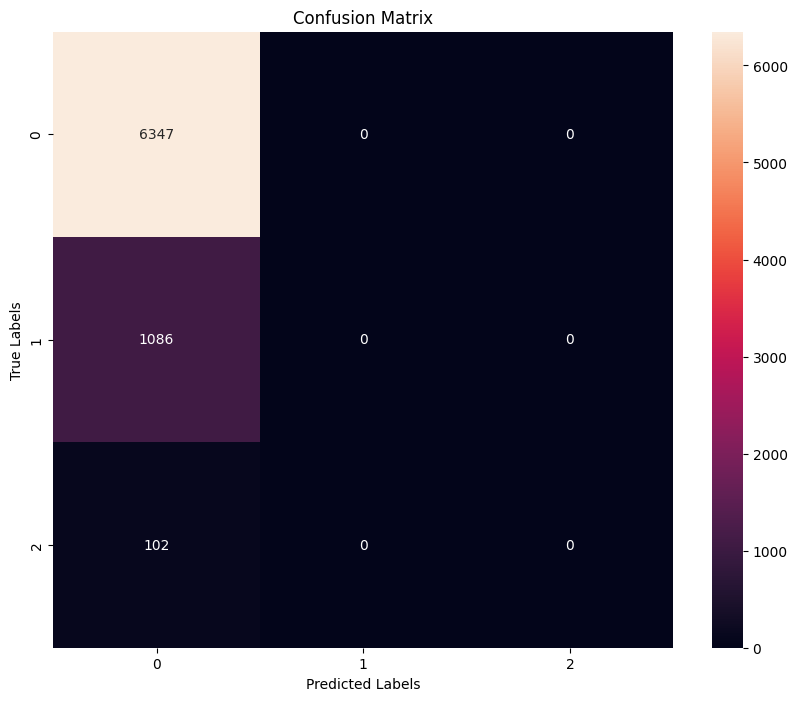

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert predictions to RDD
predictionAndLabels = training_results.select("prediction", "accident_severity_integer").rdd

# Step 2: Initialize MulticlassMetrics with the RDD
metrics = MulticlassMetrics(predictionAndLabels)

# Step 3: Get the confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# as you can see, my model is very biased towards "0.0" because most of the data has 0.0
# I will add weights to the model to try and balance it out

In [ ]:
# Calculate class weights
total_count = model_df.count()
class_counts = model_df.groupBy("accident_severity_integer").count().collect()
weights = {row['accident_severity_integer']: total_count / float(row['count']) for row in class_counts}

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

# UDF to assign weight to each row
def get_weight(class_label):
    return weights[class_label]

udf_get_weight = udf(get_weight, DoubleType())

# Add a new column for weights
weighted_model_df = model_df.withColumn('classWeight', udf_get_weight('accident_severity_integer'))

In [ ]:
training_df, test_df = weighted_model_df.randomSplit([0.7, 0.3])

log_reg = LogisticRegression(labelCol="accident_severity_integer", weightCol="classWeight", family="multinomial").fit(training_df)

results = log_reg.evaluate(training_df).predictions



In [ ]:
total_observations = results.count()

# For class 1.0
tp_1 = results[(results.accident_severity_integer == 1.0) & (results.prediction == 1.0)].count()
fn_1 = results[(results.accident_severity_integer == 1.0) & (results.prediction != 1.0)].count()
fp_1 = results[(results.accident_severity_integer != 1.0) & (results.prediction == 1.0)].count()
tn_1 = results[(results.accident_severity_integer != 1.0) & (results.prediction != 1.0)].count()

# For class 2.0
tp_2 = results[(results.accident_severity_integer == 2.0) & (results.prediction == 2.0)].count()
fn_2 = results[(results.accident_severity_integer == 2.0) & (results.prediction != 2.0)].count()
fp_2 = results[(results.accident_severity_integer != 2.0) & (results.prediction == 2.0)].count()
tn_2 = results[(results.accident_severity_integer != 2.0) & (results.prediction != 2.0)].count()

# For class 0.0
tp_0 = results[(results.accident_severity_integer == 0.0) & (results.prediction == 0.0)].count()
fn_0 = results[(results.accident_severity_integer == 0.0) & (results.prediction != 0.0)].count()
fp_0 = results[(results.accident_severity_integer != 0.0) & (results.prediction == 0.0)].count()
tn_0 = results[(results.accident_severity_integer != 0.0) & (results.prediction != 0.0)].count()

# Calculating overall accuracy
total_tp = tp_1 + tp_2 + tp_0
total_fp = fp_1 + fp_2 + fp_0
total_fn = fn_1 + fn_2 + fn_0
total_tn = tn_1 + tn_2 + tn_0
total_tp = tp_1 + tp_2 + tp_0

In [ ]:
accuracy = float(total_tp) / total_observations

print("Accuracy after adding weights: ", accuracy)

Accuracy after adding weights:  0.37481814574791694


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


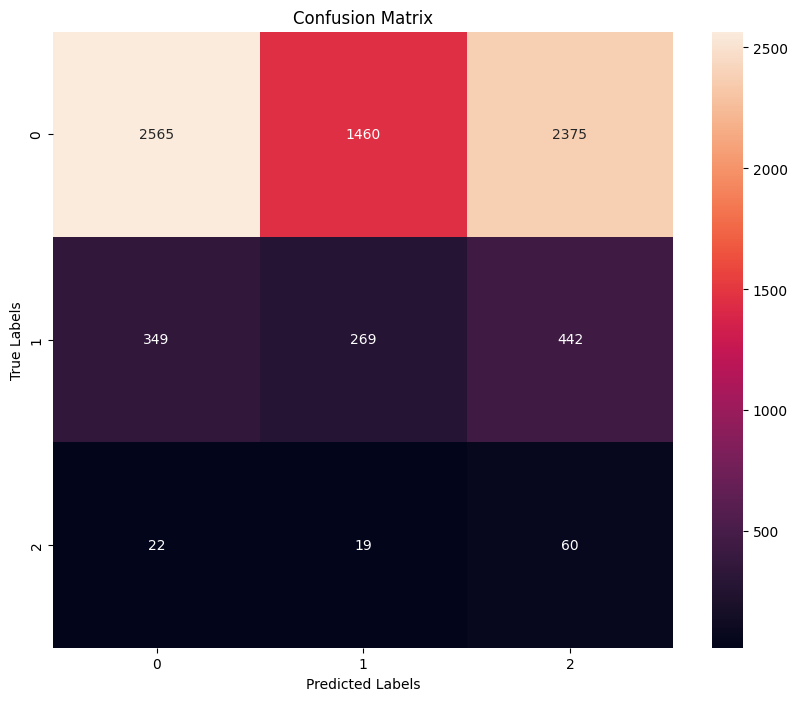

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert predictions to RDD
predictionAndLabels = results.select("prediction", "accident_severity_integer").rdd

# Step 2: Initialize MulticlassMetrics with the RDD
metrics = MulticlassMetrics(predictionAndLabels)

# Step 3: Get the confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Decision Tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
dt_df_classifier = DecisionTreeClassifier(labelCol="accident_severity_integer").fit(training_df)

In [ ]:
dt_df_predictions = dt_df_classifier.transform(test_df)

In [ ]:
dt_df_predictions.show()

+-------------+-------------------------+------------------+--------------------+--------------------+----------+
|     features|accident_severity_integer|       classWeight|       rawPrediction|         probability|prediction|
+-------------+-------------------------+------------------+--------------------+--------------------+----------+
|(9,[0],[1.0])|                      1.0|1.1802673041399543|[0.0,768.0,272.0,...|[0.0,0.7252124645...|       1.0|
|(9,[0],[1.0])|                      1.0|1.1802673041399543|[0.0,768.0,272.0,...|[0.0,0.7252124645...|       1.0|
|(9,[0],[1.0])|                      1.0|1.1802673041399543|[0.0,768.0,272.0,...|[0.0,0.7252124645...|       1.0|
|(9,[0],[1.0])|                      1.0|1.1802673041399543|[0.0,768.0,272.0,...|[0.0,0.7252124645...|       1.0|
|(9,[0],[1.0])|                      1.0|1.1802673041399543|[0.0,768.0,272.0,...|[0.0,0.7252124645...|       1.0|
|(9,[0],[1.0])|                      1.0|1.1802673041399543|[0.0,768.0,272.0,...|[0.0,0.

In [ ]:
dt_df_predictions.describe().show()

+-------+-------------------------+------------------+-------------------+
|summary|accident_severity_integer|       classWeight|         prediction|
+-------+-------------------------+------------------+-------------------+
|  count|                     3347|              3347|               3347|
|   mean|       1.1664176874813266|3.1523947828488454| 1.0146399760979983|
| stddev|      0.41067107475646775| 9.528105886945244|0.12012476226417715|
|    min|                      1.0|1.1802673041399543|                1.0|
|    max|                      3.0| 78.71014492753623|                2.0|
+-------+-------------------------+------------------+-------------------+



In [ ]:
dt_df_accuracy = MulticlassClassificationEvaluator(labelCol="accident_severity_integer",
                                                   metricName="accuracy").evaluate(dt_df_predictions)

In [ ]:
print("Accuracy: ", dt_df_accuracy)

Accuracy:  0.8464296384822229


In [ ]:
dt_df_percision = MulticlassClassificationEvaluator(labelCol="accident_severity_integer",
                                                   metricName="weightedPrecision").evaluate(dt_df_predictions)

In [ ]:
print("Percision: ", dt_df_percision)

Percision:  0.7794692421336625


In [ ]:
df.columns

['Area_accident_occured',
 'Driving_experience',
 'Age_band_of_driver',
 'Road_allignment',
 'Road_surface_type',
 'Road_surface_conditions',
 'Weather_conditions',
 'Accident_severity',
 'Light_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved']

In [ ]:
dt_df_classifier.featureImportances

SparseVector(9, {0: 0.5089, 1: 0.042, 2: 0.0323, 3: 0.0162, 4: 0.1165, 5: 0.1005, 6: 0.0114, 7: 0.0325, 8: 0.1397})